In [1]:
path = "/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/fibroblast_nucleopore_class/2018/"

In [37]:
imglabel = path +'labels/010064.txt'
imgpath = path +'JPEGImages/010064.jpg'

f = open(imglabel, 'r')
line = np.array(f.readline().split(' ')).astype(np.float64)
print(line)




[0.         0.66541353 0.40225564 0.12969925 0.14285714]


In [66]:
path = "/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/"
imglabel = path +'labels/110090.txt'
imgpath = path +'JPEGImages/110090.jpg'



[0.         0.50390625 0.1015625  0.27734375 0.19921875]
[0.         0.94335938 0.07617188 0.109375   0.1484375 ]
[0.         0.23242188 0.15429688 0.3046875  0.296875  ]
[0.         0.05664062 0.11132812 0.109375   0.1953125 ]
[0.         0.79101562 0.203125   0.2109375  0.10546875]
[0.         0.09375    0.36132812 0.18359375 0.2734375 ]
[0.         0.58984375 0.49609375 0.26171875 0.40234375]
[0.         0.34960938 0.41015625 0.2109375  0.19140625]
[0.         0.05664062 0.44335938 0.109375   0.15625   ]
[0.         0.82226562 0.54296875 0.1875     0.19140625]
[0.         0.34570312 0.5234375  0.2578125  0.10546875]
[0.         0.92382812 0.7265625  0.1484375  0.21484375]
[0.         0.47460938 0.73632812 0.296875   0.1953125 ]
[0.         0.74804688 0.80273438 0.2421875  0.171875  ]
[0.         0.18164062 0.86132812 0.28125    0.2734375 ]
[0.         0.04492188 0.8984375  0.0859375  0.19921875]
[0.         0.43359375 0.92382812 0.17578125 0.1484375 ]
[0.         0.10351562 0.601562

[0.         0.50390625 0.1015625  0.27734375 0.19921875]
[0.         0.94335938 0.07617188 0.109375   0.1484375 ]
[0.         0.23242188 0.15429688 0.3046875  0.296875  ]
[0.         0.05664062 0.11132812 0.109375   0.1953125 ]
[0.         0.79101562 0.203125   0.2109375  0.10546875]
[0.         0.09375    0.36132812 0.18359375 0.2734375 ]
[0.         0.58984375 0.49609375 0.26171875 0.40234375]
[0.         0.34960938 0.41015625 0.2109375  0.19140625]
[0.         0.05664062 0.44335938 0.109375   0.15625   ]
[0.         0.82226562 0.54296875 0.1875     0.19140625]
[0.         0.34570312 0.5234375  0.2578125  0.10546875]
[0.         0.92382812 0.7265625  0.1484375  0.21484375]
[0.         0.47460938 0.73632812 0.296875   0.1953125 ]
[0.         0.74804688 0.80273438 0.2421875  0.171875  ]
[0.         0.18164062 0.86132812 0.28125    0.2734375 ]
[0.         0.04492188 0.8984375  0.0859375  0.19921875]
[0.         0.43359375 0.92382812 0.17578125 0.1484375 ]
[0.         0.10351562 0.601562

error: OpenCV(3.4.4) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/grabcut.cpp:381: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'


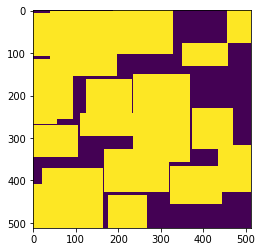

In [74]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(imgpath)

hr = img.shape[0]
wr =  img.shape[1]
mask = np.zeros(img.shape[:2],np.uint8)
f = open(imglabel, 'r')
lines = f.readlines()
for line in lines:
    line = np.array(line.split(' ')).astype(np.float64)
    print(line)
    x0 = int(line[1]*wr-(line[3]*wr)//2)
    y0 = int(line[2]*hr-(line[4]*wr)//2)
    x1 = int(x0+(line[3]*wr))
    y1 = int(y0+(line[4]*hr))
    mask[y0:y1,x0:x1] = 1

plt.imshow(mask)



bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (x0,y0,x1,y1)
cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar()
plt.plot([x0,x1,x1,x0,x0],[y0,y0,y1,y1,y0],'o')
plt.show()
plt.imshow(mask2),plt.colorbar()

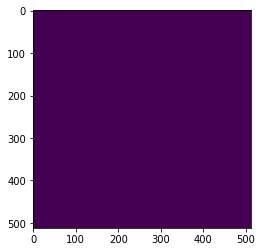

In [73]:

plt.imshow(mask)

In [85]:
#!/usr/bin/env python
'''
===============================================================================
Interactive Image Segmentation using GrabCut algorithm.
This sample shows interactive image segmentation using grabcut algorithm.
USAGE:
    python grabcut.py <filename>
README FIRST:
    Two windows will show up, one for input and one for output.
    At first, in input window, draw a rectangle around the object using
mouse right button. Then press 'n' to segment the object (once or a few times)
For any finer touch-ups, you can press any of the keys below and draw lines on
the areas you want. Then again press 'n' for updating the output.
Key '0' - To select areas of sure background
Key '1' - To select areas of sure foreground
Key '2' - To select areas of probable background
Key '3' - To select areas of probable foreground
Key 'n' - To update the segmentation
Key 'r' - To reset the setup
Key 's' - To save the results
===============================================================================
'''

import sys
import numpy as np
import cv2 as cv
import jgraph as ig
from sklearn.mixture import GMM


BLUE = [255, 0, 0]        # rectangle color
RED = [0, 0, 255]         # PR BG
GREEN = [0, 255, 0]       # PR FG
BLACK = [0, 0, 0]         # sure BG
WHITE = [255, 255, 255]   # sure FG

DRAW_BG = {'color': BLACK, 'val': 0}
DRAW_FG = {'color': WHITE, 'val': 1}
DRAW_PR_FG = {'color': GREEN, 'val': 3}
DRAW_PR_BG = {'color': RED, 'val': 2}

# setting up flags
rect = (0, 0, 1, 1)
drawing = False         # flag for drawing curves
rectangle = False       # flag for drawing rect
rect_over = False       # flag to check if rect drawn
rect_or_mask = 100      # flag for selecting rect or mask mode
value = DRAW_FG         # drawing initialized to FG
thickness = 3           # brush thickness
skip_learn_GMMs = False # whether to skip learning GMM parameters


def onmouse(event, x, y, flags, param):
    global img, img2, drawing, value, mask, rectangle, rect, rect_or_mask, ix, iy, rect_over, skip_learn_GMMs

    # Draw Rectangle
    if event == cv.EVENT_RBUTTONDOWN:
        rectangle = True
        ix, iy = x, y

    elif event == cv.EVENT_MOUSEMOVE:
        if rectangle == True:
            img = img2.copy()
            cv.rectangle(img, (ix, iy), (x, y), BLUE, 2)
            rect = (min(ix, x), min(iy, y), abs(ix-x), abs(iy-y))
            rect_or_mask = 0

    elif event == cv.EVENT_RBUTTONUP:
        rectangle = False
        rect_over = True
        cv.rectangle(img, (ix, iy), (x, y), BLUE, 2)
        rect = (min(ix, x), min(iy, y), abs(ix-x), abs(iy-y))
        rect_or_mask = 0
        print(" Now press the key 'n' a few times until no further change \n")

    # draw touchup curves

    if event == cv.EVENT_LBUTTONDOWN:
        if rect_over == False:
            print("first draw rectangle \n")
        else:
            drawing = True
            cv.circle(img, (x, y), thickness, value['color'], -1)
            cv.circle(mask, (x, y), thickness, value['val'], -1)

    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.circle(img, (x, y), thickness, value['color'], -1)
            cv.circle(mask, (x, y), thickness, value['val'], -1)

    elif event == cv.EVENT_LBUTTONUP:
        if drawing == True:
            drawing = False
            cv.circle(img, (x, y), thickness, value['color'], -1)
            cv.circle(mask, (x, y), thickness, value['val'], -1)
            skip_learn_GMMs = True


class GrabCut:
    def __init__(self, img, mask, rect=None, gmm_components=5):
        self.img = np.asarray(img, dtype=np.float64)
        self.rows, self.cols, _ = img.shape

        self.mask = mask
        if rect is not None:
            self.mask[rect[1]:rect[1] + rect[3],
                      rect[0]:rect[0] + rect[2]] = DRAW_PR_FG['val']
        self.classify_pixels()

        # Best number of GMM components K suggested in paper
        self.gmm_components = gmm_components
        self.gamma = 50  # Best gamma suggested in paper formula (5)
        self.beta = 0

        self.left_V = np.empty((self.rows, self.cols - 1))
        self.upleft_V = np.empty((self.rows - 1, self.cols - 1))
        self.up_V = np.empty((self.rows - 1, self.cols))
        self.upright_V = np.empty((self.rows - 1, self.cols - 1))

        self.bgd_gmm = None
        self.fgd_gmm = None
        self.comp_idxs = np.empty((self.rows, self.cols), dtype=np.uint32)

        self.gc_graph = None
        self.gc_graph_capacity = None           # Edge capacities
        self.gc_source = self.cols * self.rows  # "object" terminal S
        self.gc_sink = self.gc_source + 1       # "background" terminal T

        self.calc_beta_smoothness()
        self.init_GMMs()
        self.run()

    def calc_beta_smoothness(self):
        _left_diff = self.img[:, 1:] - self.img[:, :-1]
        _upleft_diff = self.img[1:, 1:] - self.img[:-1, :-1]
        _up_diff = self.img[1:, :] - self.img[:-1, :]
        _upright_diff = self.img[1:, :-1] - self.img[:-1, 1:]

        self.beta = np.sum(np.square(_left_diff)) + np.sum(np.square(_upleft_diff)) + \
            np.sum(np.square(_up_diff)) + \
            np.sum(np.square(_upright_diff))
        self.beta = 1 / (2 * self.beta / (
            # Each pixel has 4 neighbors (left, upleft, up, upright)
            4 * self.cols * self.rows
            # The 1st column doesn't have left, upleft and the last column doesn't have upright
            - 3 * self.cols
            - 3 * self.rows  # The first row doesn't have upleft, up and upright
            + 2))  # The first and last pixels in the 1st row are removed twice
        print('Beta:', self.beta)

        # Smoothness term V described in formula (11)
        self.left_V = self.gamma * np.exp(-self.beta * np.sum(
            np.square(_left_diff), axis=2))
        self.upleft_V = self.gamma / np.sqrt(2) * np.exp(-self.beta * np.sum(
            np.square(_upleft_diff), axis=2))
        self.up_V = self.gamma * np.exp(-self.beta * np.sum(
            np.square(_up_diff), axis=2))
        self.upright_V = self.gamma / np.sqrt(2) * np.exp(-self.beta * np.sum(
            np.square(_upright_diff), axis=2))

    def classify_pixels(self):
        self.bgd_indexes = np.where(np.logical_or(
            self.mask == DRAW_BG['val'], self.mask == DRAW_PR_BG['val']))
        self.fgd_indexes = np.where(np.logical_or(
            self.mask == DRAW_FG['val'], self.mask == DRAW_PR_FG['val']))

        assert self.bgd_indexes[0].size > 0
        assert self.fgd_indexes[0].size > 0

        print('(pr_)bgd count: %d, (pr_)fgd count: %d' % (
            self.bgd_indexes[0].size, self.fgd_indexes[0].size))

    def init_GMMs(self):
        self.bgd_gmm = GMM.GaussianMixture(self.img[self.bgd_indexes])
        self.fgd_gmm = GMM.GaussianMixture(self.img[self.fgd_indexes])

    def assign_GMMs_components(self):
        """Step 1 in Figure 3: Assign GMM components to pixels"""
        self.comp_idxs[self.bgd_indexes] = self.bgd_gmm.which_component(
            self.img[self.bgd_indexes])
        self.comp_idxs[self.fgd_indexes] = self.fgd_gmm.which_component(
            self.img[self.fgd_indexes])

    def learn_GMMs(self):
        """Step 2 in Figure 3: Learn GMM parameters from data z"""
        self.bgd_gmm.fit(self.img[self.bgd_indexes],
                         self.comp_idxs[self.bgd_indexes])
        self.fgd_gmm.fit(self.img[self.fgd_indexes],
                         self.comp_idxs[self.fgd_indexes])

    def construct_gc_graph(self):
        bgd_indexes = np.where(self.mask.reshape(-1) == DRAW_BG['val'])
        fgd_indexes = np.where(self.mask.reshape(-1) == DRAW_FG['val'])
        pr_indexes = np.where(np.logical_or(
            self.mask.reshape(-1) == DRAW_PR_BG['val'], self.mask.reshape(-1) == DRAW_PR_FG['val']))

        print('bgd count: %d, fgd count: %d, uncertain count: %d' % (
            len(bgd_indexes[0]), len(fgd_indexes[0]), len(pr_indexes[0])))

        edges = []
        self.gc_graph_capacity = []

        # t-links
        edges.extend(
            list(zip([self.gc_source] * pr_indexes[0].size, pr_indexes[0])))
        _D = -np.log(self.bgd_gmm.calc_prob(self.img.reshape(-1, 3)[pr_indexes]))
        self.gc_graph_capacity.extend(_D.tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        edges.extend(
            list(zip([self.gc_sink] * pr_indexes[0].size, pr_indexes[0])))
        _D = -np.log(self.fgd_gmm.calc_prob(self.img.reshape(-1, 3)[pr_indexes]))
        self.gc_graph_capacity.extend(_D.tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        edges.extend(
            list(zip([self.gc_source] * bgd_indexes[0].size, bgd_indexes[0])))
        self.gc_graph_capacity.extend([0] * bgd_indexes[0].size)
        assert len(edges) == len(self.gc_graph_capacity)

        edges.extend(
            list(zip([self.gc_sink] * bgd_indexes[0].size, bgd_indexes[0])))
        self.gc_graph_capacity.extend([9 * self.gamma] * bgd_indexes[0].size)
        assert len(edges) == len(self.gc_graph_capacity)

        edges.extend(
            list(zip([self.gc_source] * fgd_indexes[0].size, fgd_indexes[0])))
        self.gc_graph_capacity.extend([9 * self.gamma] * fgd_indexes[0].size)
        assert len(edges) == len(self.gc_graph_capacity)

        edges.extend(
            list(zip([self.gc_sink] * fgd_indexes[0].size, fgd_indexes[0])))
        self.gc_graph_capacity.extend([0] * fgd_indexes[0].size)
        assert len(edges) == len(self.gc_graph_capacity)

        # print(len(edges))

        # n-links
        img_indexes = np.arange(self.rows * self.cols,
                                dtype=np.uint32).reshape(self.rows, self.cols)

        mask1 = img_indexes[:, 1:].reshape(-1)
        mask2 = img_indexes[:, :-1].reshape(-1)
        edges.extend(list(zip(mask1, mask2)))
        self.gc_graph_capacity.extend(self.left_V.reshape(-1).tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        mask1 = img_indexes[1:, 1:].reshape(-1)
        mask2 = img_indexes[:-1, :-1].reshape(-1)
        edges.extend(list(zip(mask1, mask2)))
        self.gc_graph_capacity.extend(
            self.upleft_V.reshape(-1).tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        mask1 = img_indexes[1:, :].reshape(-1)
        mask2 = img_indexes[:-1, :].reshape(-1)
        edges.extend(list(zip(mask1, mask2)))
        self.gc_graph_capacity.extend(self.up_V.reshape(-1).tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        mask1 = img_indexes[1:, :-1].reshape(-1)
        mask2 = img_indexes[:-1, 1:].reshape(-1)
        edges.extend(list(zip(mask1, mask2)))
        self.gc_graph_capacity.extend(
            self.upright_V.reshape(-1).tolist())
        assert len(edges) == len(self.gc_graph_capacity)

        assert len(edges) == 4 * self.cols * self.rows - 3 * (self.cols + self.rows) + 2 + \
            2 * self.cols * self.rows

        self.gc_graph = ig.Graph(self.cols * self.rows + 2)
        self.gc_graph.add_edges(edges)

    def estimate_segmentation(self):
        """Step 3 in Figure 3: Estimate segmentation"""
        mincut = self.gc_graph.st_mincut(
            self.gc_source, self.gc_sink, self.gc_graph_capacity)
        print('foreground pixels: %d, background pixels: %d' % (
            len(mincut.partition[0]), len(mincut.partition[1])))
        pr_indexes = np.where(np.logical_or(
            self.mask == DRAW_PR_BG['val'], self.mask == DRAW_PR_FG['val']))
        img_indexes = np.arange(self.rows * self.cols,
                                dtype=np.uint32).reshape(self.rows, self.cols)
        self.mask[pr_indexes] = np.where(np.isin(img_indexes[pr_indexes], mincut.partition[0]),
                                         DRAW_PR_FG['val'], DRAW_PR_BG['val'])
        self.classify_pixels()

    def calc_energy(self):
        U = 0
        for ci in range(self.gmm_components):
            idx = np.where(np.logical_and(self.comp_idxs == ci, np.logical_or(
                self.mask == DRAW_BG['val'], self.mask == DRAW_PR_BG['val'])))
            U += np.sum(-np.log(self.bgd_gmm.coefs[ci] * self.bgd_gmm.calc_score(self.img[idx], ci)))

            idx = np.where(np.logical_and(self.comp_idxs == ci, np.logical_or(
                self.mask == DRAW_FG['val'], self.mask == DRAW_PR_FG['val'])))
            U += np.sum(-np.log(self.fgd_gmm.coefs[ci] * self.fgd_gmm.calc_score(self.img[idx], ci)))

        V = 0
        mask = self.mask.copy()
        mask[np.where(mask == DRAW_PR_BG['val'])] = DRAW_BG['val']
        mask[np.where(mask == DRAW_PR_FG['val'])] = DRAW_FG['val']

        V += np.sum(self.left_V * (mask[:, 1:] == mask[:, :-1]))
        V += np.sum(self.upleft_V * (mask[1:, 1:] == mask[:-1, :-1]))
        V += np.sum(self.up_V * (mask[1:, :] == mask[:-1, :]))
        V += np.sum(self.upright_V * (mask[1:, :-1] == mask[:-1, 1:]))
        return U, V, U + V

    def run(self, num_iters=1, skip_learn_GMMs=False):
        print('skip learn GMMs:', skip_learn_GMMs)
        for _ in range(num_iters):
            if not skip_learn_GMMs:
                self.assign_GMMs_components()
                self.learn_GMMs()
            self.construct_gc_graph()
            self.estimate_segmentation()
            skip_learn_GMMs = False
            # print('data term: %f, smoothness term: %f, total energy: %f' % self.calc_energy())


if __name__ == '__main__':

    # print documentation
    print(__doc__)

    # Loading images
    if len(sys.argv) == 2:
        filename = sys.argv[1]  # for drawing purposes
    else:
        print("No input image given, so loading default image, messi5.jpg \n")
        print("Correct Usage: python grabcut.py <filename> \n")
        filename = 'messi5.jpg'

    img = cv.imread(filename)
    img2 = img.copy()                               # a copy of original image
    mask = np.zeros(img.shape[:2], dtype=np.uint8)  # mask initialized to PR_BG
    output = np.zeros(img.shape, np.uint8)           # output image to be shown

    # input and output windows
    cv.namedWindow('output')
    cv.namedWindow('input')
    cv.setMouseCallback('input', onmouse)
    cv.moveWindow('input', img.shape[1]+10, 90)

    print(" Instructions: \n")
    print(" Draw a rectangle around the object using right mouse button \n")

    while(1):

        cv.imshow('output', output)
        cv.imshow('input', img)
        k = cv.waitKey(1)

        # key bindings
        if k == 27:         # esc to exit
            break
        elif k == ord('0'):  # BG drawing
            print(" mark background regions with left mouse button \n")
            value = DRAW_BG
        elif k == ord('1'):  # FG drawing
            print(" mark foreground regions with left mouse button \n")
            value = DRAW_FG
        elif k == ord('2'):  # PR_BG drawing
            value = DRAW_PR_BG
        elif k == ord('3'):  # PR_FG drawing
            value = DRAW_PR_FG
        elif k == ord('s'):  # save image
            bar = np.zeros((img.shape[0], 5, 3), np.uint8)
            res = np.hstack((img2, bar, img, bar, output))
            cv.imwrite('grabcut_output.png', res)
            print(" Result saved as image \n")
        elif k == ord('r'):  # reset everything
            print("resetting \n")
            rect = (0, 0, 1, 1)
            drawing = False
            rectangle = False
            rect_or_mask = 100
            rect_over = False
            value = DRAW_FG
            img = img2.copy()
            # mask initialized to PR_BG
            mask = np.zeros(img.shape[:2], dtype=np.uint8)
            # output image to be shown
            output = np.zeros(img.shape, np.uint8)
        elif k == ord('n'):  # segment the image
            print(""" For finer touchups, mark foreground and background after pressing keys 0-3
            and again press 'n' \n""")
            print(rect)
            if (rect_or_mask == 0):         # grabcut with rect
                gc = GrabCut(img2, mask, rect)
                rect_or_mask = 1
            elif rect_or_mask == 1:         # grabcut with mask
                gc.run(skip_learn_GMMs=skip_learn_GMMs)
                skip_learn_GMMs = False

        mask2 = np.where((mask == 1) + (mask == 3), 255, 0).astype('uint8')
        output = cv.bitwise_and(img2, img2, mask=mask2)

    cv.destroyAllWindows()


Interactive Image Segmentation using GrabCut algorithm.
This sample shows interactive image segmentation using grabcut algorithm.
USAGE:
    python grabcut.py <filename>
README FIRST:
    Two windows will show up, one for input and one for output.
    At first, in input window, draw a rectangle around the object using
mouse right button. Then press 'n' to segment the object (once or a few times)
For any finer touch-ups, you can press any of the keys below and draw lines on
the areas you want. Then again press 'n' for updating the output.
Key '0' - To select areas of sure background
Key '1' - To select areas of sure foreground
Key '2' - To select areas of probable background
Key '3' - To select areas of probable foreground
Key 'n' - To update the segmentation
Key 'r' - To reset the setup
Key 's' - To save the results

No input image given, so loading default image, messi5.jpg 

Correct Usage: python grabcut.py <filename> 



AttributeError: 'NoneType' object has no attribute 'copy'